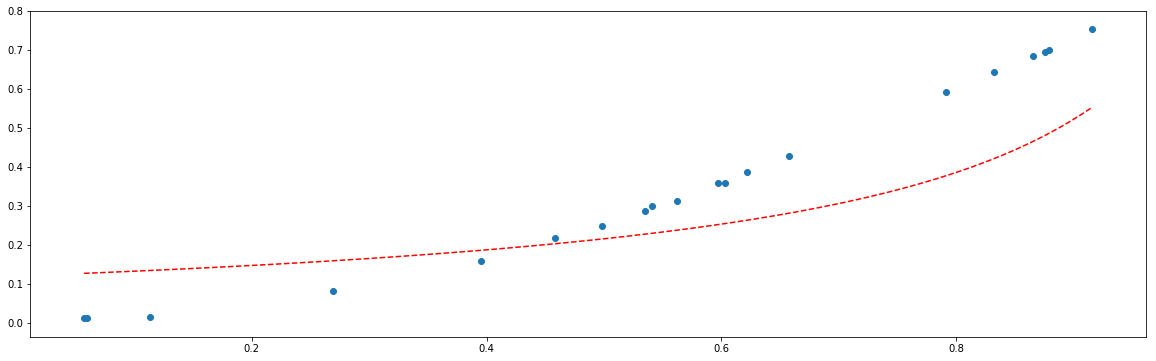

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#base is the vector of monomials up to order N evaluated at x
def base(x,N):
    M=np.ones(x.size)
    for i in range(1,N+1):
        M=np.vstack([M ,x**i])
    return M.T

n=20 #order
p=20 #number of points to generate/observe
r=0.01 #observation noise std dev
rho = 13.04 #regulariser

#generate observations: sin(x**2)
x=np.sort(np.random.rand(p))
y=np.sin(x**2)+np.random.rand(p)*r

#define basis and calculate optimal weights
phi=base(x,n)
w=np.linalg.solve(phi.T.dot(phi)+rho*np.eye(n+1),phi.T).dot(y)

#interpolate
x_e=np.linspace(x.min(),x.max(),100)
y_e=base(x_e,n).dot(w)

#plot
fig = plt.figure(figsize=(20,6))
plt.scatter(x,y)
plt.plot(x_e,y_e,'r--')
plt.show()

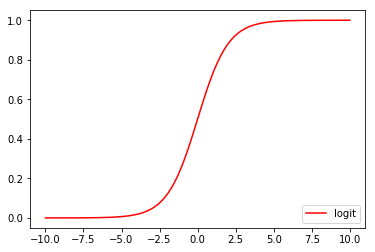

In [8]:
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

In [81]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Automatically created module for IPython interactive environment


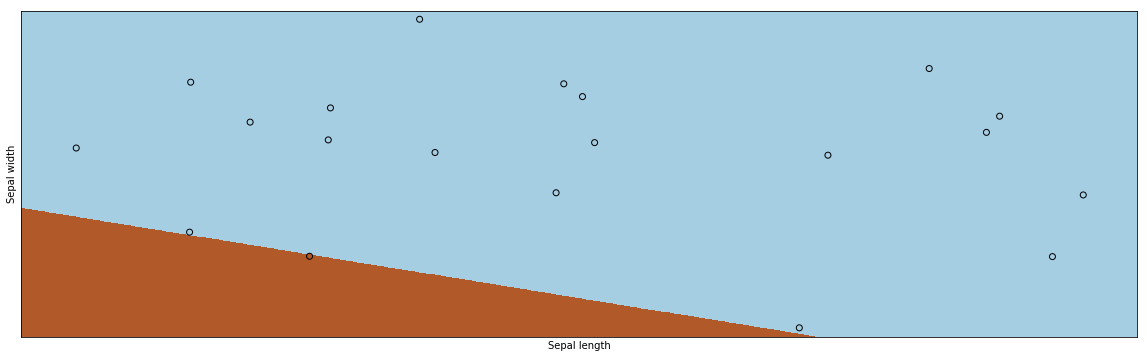

Acuracy is 1.0


In [84]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_breast_cancer()
#iris = datasets.load_iris()
hasta = 20
X = iris.data[:hasta, :2]  # we only take the first two features.
Y = iris.target[:hasta]

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(20, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

from sklearn.metrics import accuracy_score
print(f'Acuracy is {accuracy_score(Y, logreg.predict(X))}')


In [39]:
print(Z)

[[1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]]


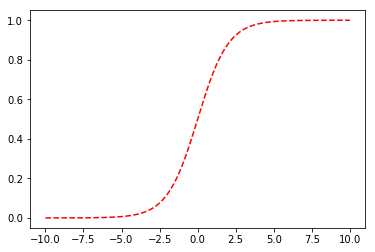

In [16]:

#redefine print operator for simplicity
def p(s):
    print(s)

#define logistic function
def logistic(a):
    return 1.0 / (1 + np.exp(-a))


def irls(X, y):
    theta = np.zeros(X.shape[1])
    theta_ = np.inf
    while max(abs(theta-theta_)) > 1e-6:
        a = np.dot(X, theta)
        pi = logistic(a)
        SX = X * (pi - pi*pi).reshape(-1,1)
        XSX = np.dot(X.T, SX)
        SXtheta = np.dot(SX, theta)
        theta_ = theta
        theta = np.linalg.solve(XSX, np.dot(X.T, SXtheta + y - pi))
    return theta

t = np.arange(-10,10, 0.01)
plt.plot(t, logistic(t), 'r--')
plt.show()

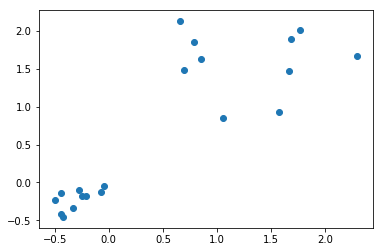

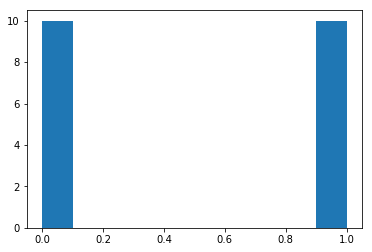

In [17]:
N=10
W=np.array([0.3333 , 0.8636])
X=np.vstack([np.random.rand(N,2)*0.5-0.5 , np.random.rand(N,2)*2+0.5])
y=np.round(logistic(X.dot(W)))

plt.figure(1)
plt.scatter(X[:,0],X[:,1])
plt.figure(2)
plt.hist(y)

plt.show()

In [18]:
irls(X, y)

/home/felipe/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in exp


KeyboardInterrupt: 